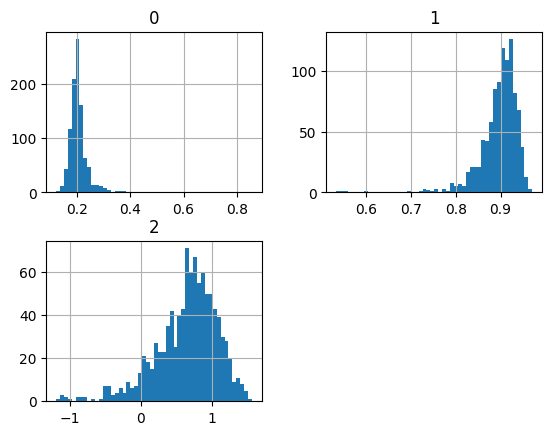

In [1]:
import numpy as np
import pandas as pd

ruta='/content/drive/MyDrive/Colab Notebooks/Módulo 4 - Transformaciones de variables numéricas/'
df_num=pd.read_csv(ruta+'numericos.csv')
H=df_num.hist(bins=50)

In [2]:
df_num.skew()

,0
0,6.000314
1,-2.772736
2,-1.012379


In [3]:
# Compensando la variable '0'
#
lmbd=11 # 10 # 11 # 8 # 7 # 3 # 2
x=df_num['0']-df_num['0'].min()+1
x_compensada=-(1/x**lmbd-1)
x_compensada.skew()

np.float64(-0.04181647238238559)

In [4]:
import matplotlib.pyplot as plt

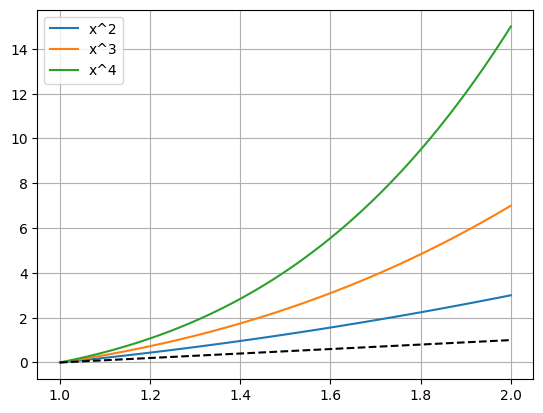

In [5]:
# Transformaciones para compensar el sesgo negativo
x=np.linspace(1,2,100)
x_2=x**2-1
x_3=x**3-1
x_4=x**4-1
plt.plot(x,x_2,label='x^2')
plt.plot(x,x_3,label='x^3')
plt.plot(x,x_4,label='x^4')
plt.legend()
plt.plot(x,x-1,'--k')
plt.grid()

In [6]:
# Compensando el resto de variables
#
lmbd=17.4 # 20 # 2
x=df_num['1']-df_num['1'].min()+1
x_compensada=x**lmbd-1            # Transformación de potencia
x_compensada.skew()

np.float64(-0.00020894607913984065)

In [7]:
lmbd=2.9 # 2
x=df_num['2']-df_num['2'].min()+1
x_compensada=x**lmbd-1            # Transformación de potencia
x_compensada.skew()

np.float64(-0.008818419220121089)

In [8]:
df_num=pd.read_csv(ruta+'sesgo.csv')
df_num.skew()

,0
1.0,1.021248
1.1,1.118874
1.2,1.207519
1.4,1.438625
1.5,1.500396
2.5,2.510211
3.0,3.080673
0.7,0.706180
0.6,0.615026
0.8,0.794087


Definir una función para encontrar la transformación adecuada dependiendo del valor del sesgo, considerando los siguientes puntitos:
* Evitar valores de `lmbd` en 0 y en 1.
* Considerar valores de `lmbd` fraccionarios de 0.5.
* Limitar la búsqueda en un rango de $(-10,10)$.
* La función debe recibir como argumento la variable a transformar y debe regresar el valor de `lmbd` y el sesgo resultante de la transformación.

In [9]:
# Función by Arroyo
#
def fix_skew(x: pd.Series) -> tuple:
  skew=x.skew()
  lambdas=np.arange(-10,10.5,0.5)
  best_lambda=0
  best_skew=skew

  for l in lambdas:
    if l==1:
      continue
    if l==0:
      if abs(np.log(x).skew())<abs(best_skew):
        best_skew=np.log(x).skew()
        best_lambda='log'
      continue
    if abs((x**l-1).skew())<abs(best_skew):
      best_skew=(x**l-1).skew()
      best_lambda=l
  return (best_skew,best_lambda)

In [10]:
print('sesgo\tbest_sesgo\t\tlambda')
for x in df_num.columns:
  print(x,*fix_skew(df_num[x]-df_num[x].min()+1),sep='\t')

sesgo	best_sesgo		lambda
1.0	-0.35299940437156685	log
1.1	-0.36301124937907747	log
1.2	-0.12621718702668058	log
1.4	0.01170896940697781	log
1.5	-0.25227818308903077	log
2.5	-0.17119939610417215	-0.5
3.0	-0.027390363254622452	-1.5
0.7	0.17743449762614963	0.5
0.6	0.030021310469718978	0.5
0.8	0.2071555106270847	0.5
0.5	-0.0803635253412769	0.5
0.4	-0.1255012825645533	0.5
-1.0	0.010301022899584601	2.5
-0.8	-0.04577845391022726	2.0
-0.6	0.021162133162813665	2.0
-0.5	-0.0744884804924426	1.5
-2.0	-0.031676852549005985	5.5
-1.5	-0.031183974802382813	4.5
-1.3	0.05345631972949036	3.5
-2.5	-0.0004838012186387169	7.0
-3.0	-0.02428538204717082	8.5


Modificamos la transformación de tal forma que, al hacer tender $\lambda$ a cero, resulte una función contínua:
$$
x'=\frac{x^\lambda-1}{\lambda},
$$
para $x\geq1$. Encontramos el límite para $\lambda$
$$
\lim_{\lambda\rightarrow0}\dfrac{x^\lambda-1}{\lambda}=\lim_{\lambda\rightarrow0}\dfrac{x^\lambda\ln(x)}{1}=\ln(x).
$$
Por lo que, la transformación de potencias resulta
$$
x'=\left\{\begin{array}{ll}
\dfrac{x^\lambda-1}{\lambda},&\lambda\neq0\\
\ln(x),&\lambda=0.
\end{array}\right.
$$
Esta transformación es llamada **Box-Cox**.

In [11]:
from scipy.stats import boxcox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
# boxcox?
print('sesgo\tbest_sesgo\t\tlambda')
for x in df_num.columns:
  x_p,lmbd=boxcox(df_num[x]-df_num[x].min()+1)
  print(x,pd.DataFrame(x_p).skew()[0],lmbd,sep='\t')

sesgo	best_sesgo		lambda
1.0	0.005575018832073466	0.2447881861985349
1.1	0.010878602948649532	0.22964109194079604
1.2	0.0066516315743403555	0.08696678173544997
1.4	-0.0005231955888931896	-0.007771538445112154
1.5	0.005041049000071112	0.14304201553174972
2.5	-0.031375032031707405	-0.6532329622659935
3.0	0.21465246655524808	-1.1825565345287845
0.7	0.009126601501524601	0.3471204922251196
0.6	0.018985697674819522	0.49056709832397627
0.8	0.012797031596186276	0.3395751738251573
0.5	0.026800997788691765	0.5988368462321451
0.4	0.02359569169506518	0.6421923332915934
-1.0	-0.019749882289197447	2.440607317471943
-0.8	-0.07947189478298439	1.9440037421127543
-0.6	-0.05305748007415206	1.8593313494955532
-0.5	0.010824466172016819	1.61611835122599
-2.0	-0.27364338757945517	4.564234169441804
-1.5	-0.2557863519959522	3.7050576982649934
-1.3	-0.20582418679262082	2.8461654135938086
-2.5	-0.2789876525478916	5.694319155089071
-3.0	-0.13257394744759138	7.8901734469031135


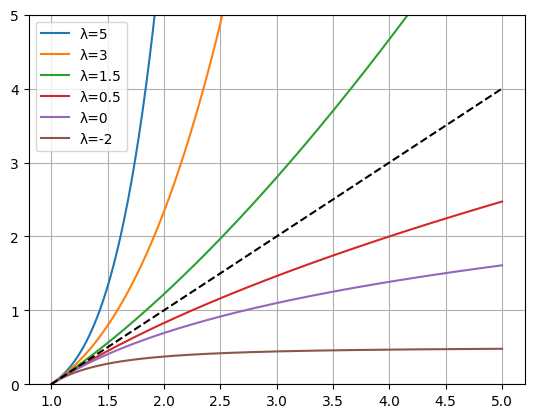

In [13]:
x=np.linspace(1,5,500)
lambdas=[5,3,1.5,0.5,0,-2]
for lmbd in lambdas:
  x_p=boxcox(x,lmbd)
  plt.plot(x,x_p,label=f'λ={lmbd}')
plt.plot(x,x-1,'--k')
plt.ylim(0,5)
plt.legend()
plt.grid()

Consideramos ahora los signos de $x$ para la transformación Box-Cox
$$
x'=\left\{\begin{array}{ll}
\mathrm{sign}(x)\dfrac{|x|^\lambda-1}{\lambda},&\lambda\neq0\\
\mathrm{sign}(x)\ln(|x|),&\lambda=0.
\end{array}\right.
$$


In [14]:
def boxcoxS(x,lmbd):
  if lmbd==0:
    return np.sign(x)*np.log(np.abs(x))
  else:
    return np.sign(x)*(np.abs(x)**lmbd-1)/lmbd

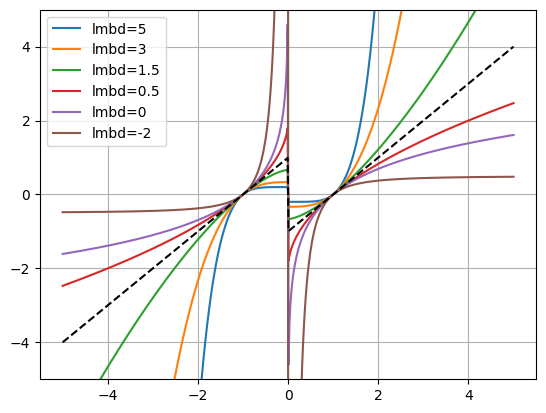

In [15]:
x=np.linspace(-5,5,500)
for lmbd in lambdas:
  plt.plot(x,boxcoxS(x,lmbd),label=f'lmbd={lmbd}')
plt.legend()
plt.plot(x,boxcoxS(x,1),'--k')
plt.ylim(-5,5)
plt.grid()

Para considerar los valores cercanos a cero, desplazamo' la $x$:
$$
x'=\left\{\begin{array}{ll}
\mathrm{sign}(x)\dfrac{(|x|+1)^\lambda-1}{\lambda},&\lambda\neq0\\
\mathrm{sign}(x)\ln(|x|+1),&\lambda=0.
\end{array}\right.
$$

In [16]:
def boxcoxS(x,lmbd):
  if lmbd==0:
    return np.sign(x)*np.log(np.abs(x)+1)
  else:
    return np.sign(x)*((np.abs(x)+1)**lmbd-1)/lmbd

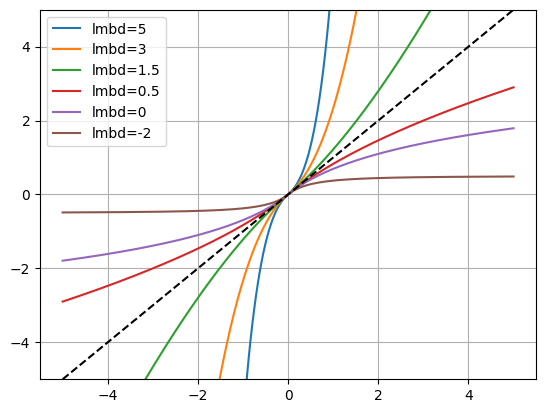

In [17]:
for lmbd in lambdas:
  plt.plot(x,boxcoxS(x,lmbd),label=f'lmbd={lmbd}')
plt.legend()
plt.plot(x,boxcoxS(x,1),'--k')
plt.ylim(-5,5)
plt.grid()

Para que la compensación de sesgos para valores positivos y negativos de $x$, sea consistente, debemos aplicar diferentes $\lambda$s para $x\geq0$ y para $x<0$:
$$
x'=\left\{\begin{array}{ll}
\dfrac{(x+1)^{\lambda_+}-1}{\lambda_+},&x\geq0,\;\lambda_+\neq0\\
\ln(x+1),&x\geq0,\;\lambda_+=0\\
-\dfrac{(-x+1)^{\lambda_-}-1}{\lambda_-},&x<0,\;\lambda_-\neq0\\
-\ln(-x+1),&x<0,\;\lambda_-=0.
\end{array}\right.
$$
Para que exista continuidad en cero (donde hacemos el cambio de $\lambda$s), imponemos que $\lambda_++\lambda_-=2$, definiendo así la transformación **Yeo-Johnson**:
$$
x'=\left\{\begin{array}{ll}
\dfrac{(x+1)^{\lambda}-1}{\lambda},&x\geq0,\;\lambda\neq0\\
\ln(x+1),&x\geq0,\;\lambda=0\\
-\dfrac{(-x+1)^{2-\lambda}-1}{2-\lambda},&x<0,\;\lambda\neq2\\
-\ln(-x+1),&x<0,\;\lambda=2,
\end{array}\right.
$$
para $x\in\mathbb{R}^n$.

In [18]:
from scipy.stats import yeojohnson

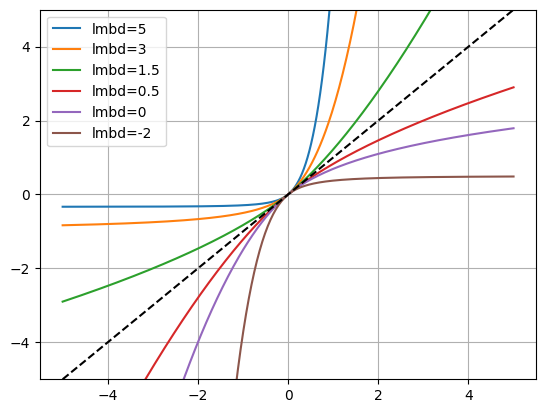

In [19]:
for lmbd in lambdas:
  plt.plot(x,yeojohnson(x,lmbd),label=f'lmbd={lmbd}')
plt.legend()
plt.plot(x,x,'--k')
plt.ylim(-5,5)
plt.grid()

# Regresión lineal

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.datasets import fetch_california_housing

df_california=pd.DataFrame(fetch_california_housing().data,columns=fetch_california_housing().feature_names)
df_california['MedHouseVal']=fetch_california_housing().target
df_california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [23]:
# Separación de datos
#
X_california_train,X_california_test,y_california_train,y_california_test=train_test_split(df_california.drop(columns='MedHouseVal'),
                                                                                           df_california['MedHouseVal'])

# Transformaciones no lineales
X_train=X_california_train.copy()
lmbd_x=[]
for var in X_california_train:
  X_train[var],lmbd=yeojohnson(X_california_train[var])
  lmbd_x.append(lmbd)
y_train,lmbd_y=yeojohnson(y_california_train)

lmbd_x,lmbd_y

([np.float64(-0.18669831231220688),
  np.float64(0.8081047519887592),
  np.float64(-0.5244884751012681),
  np.float64(-4.4405974394377505),
  np.float64(0.23291798943296374),
  np.float64(-0.9301252577521394),
  np.float64(-5.2994886686254405),
  np.float64(8.018640634496784)],
 np.float64(-0.34612216273064766))

In [24]:
# Entrenamiento
#
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [26]:
# Prueba
#
X_test=X_california_test.copy()
for i,var in enumerate(X_california_test):
  X_test[var]=yeojohnson(X_california_test[var],lmbd_x[i])
y_test=yeojohnson(y_california_test,lmbd_y)
reg.score(X_test,y_test),reg.score(X_train,y_train)

(0.6011983402627665, 0.6083244106988259)

In [27]:
# Inversas de Box-Cox y Yeo-Johnson
from scipy.special import inv_boxcox

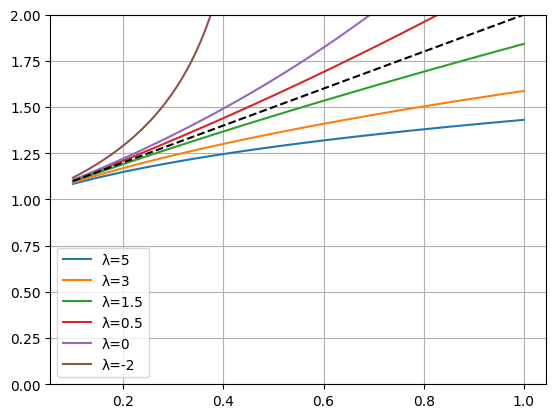

In [30]:
# Para considerar las transformaciones recíprocas, 0<x<1
x=np.linspace(0.1,1,100)

for lmbd in lambdas:
  x_p=inv_boxcox(x,lmbd)
  plt.plot(x,x_p,label=f'λ={lmbd}')
plt.plot(x,x+1,'--k')
plt.legend()
plt.ylim(0,2)
plt.grid()

In [31]:
from sklearn.preprocessing import PowerTransformer

In [35]:
yj_transformer_X=PowerTransformer(standardize=False)
yj_transformer_y=PowerTransformer(standardize=False)
yj_transformer_X.fit(X_california_train)
yj_transformer_y.fit(y_california_train.values.reshape(-1,1))

yj_transformer_X.lambdas_,yj_transformer_y.lambdas_

(array([-0.18669828,  0.80810481, -0.52448848, -4.44059742,  0.23291796,
        -0.93012537, -5.29950085,  8.32425699]),
 array([-0.34612217]))

In [36]:
# Acá está la inversa
# yj_transformer_y.inverse_transform?

In [38]:
# Predicción
#
X=df_california.copy()
X.drop(columns='MedHouseVal',inplace=True)
for i,var in enumerate(X):
  X[var]=yeojohnson(X[var],lmbd_x[i])

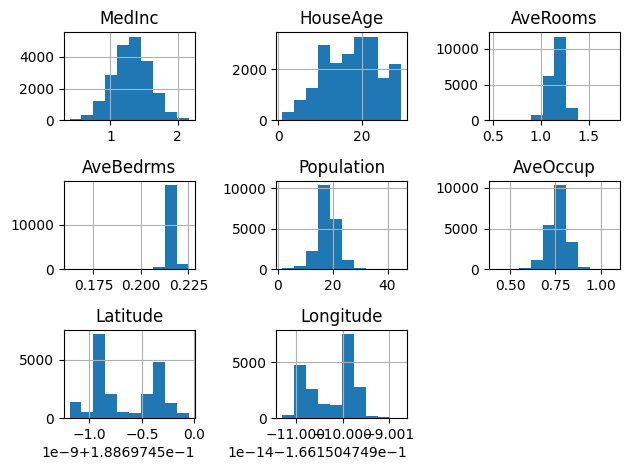

In [39]:
X.hist()
plt.tight_layout()

In [41]:
y_pred=reg.predict(X)
y=yj_transformer_y.inverse_transform(y_pred.reshape(-1,1))

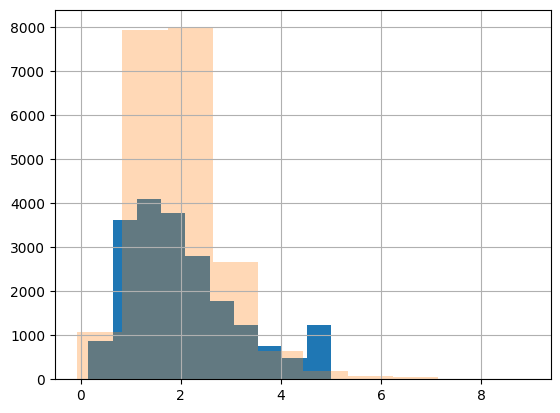

In [45]:
df_california['MedHouseVal'].hist()
H=plt.hist(y,alpha=0.3)